<a href="https://colab.research.google.com/github/dhanunjairam/Youtube_Adview_prediction/blob/main/YOUTUBE_ADVIEW_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/train_lyst1720633824458.csv")

In [ ]:
data.head(30)

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D
5,VID_10756,4,78,0,0,0,2016-05-09,PT15S,D
6,VID_9782,40621,43118,15,1,0,2015-08-21,PT3M20S,D
7,VID_16452,1,14205,55,16,1,2016-08-01,PT58S,E
8,VID_18486,1,526015,3064,211,2582,2015-11-06,PT27M50S,F
9,VID_681,1,406992,3831,310,7839,2016-10-03,PT11M19S,B


In [ ]:
data.shape

(14999, 9)

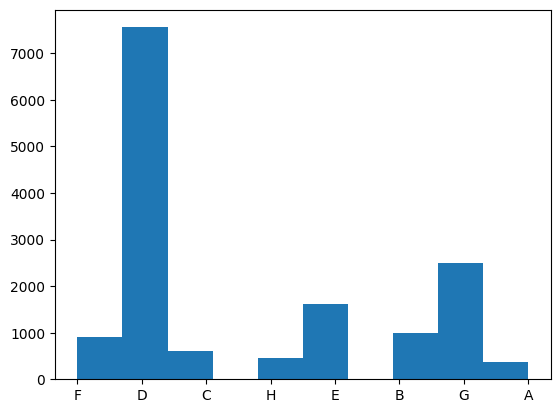

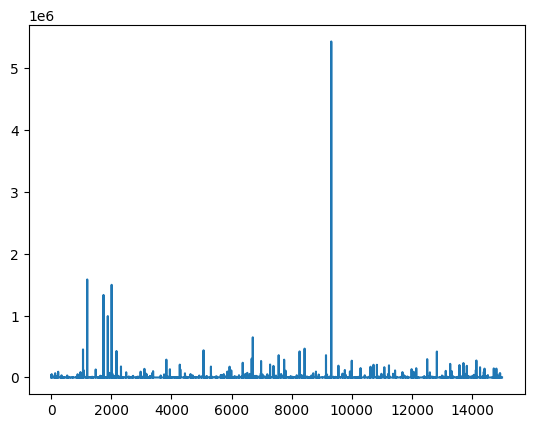

In [ ]:
plt.hist(data['category'])
plt.show()
plt.plot(data['adview'])
plt.show()

In [ ]:
data = data[data["adview"] <2000000]

In [ ]:
data = data[data.views !=  'F']
data = data[data.likes !=  'F']
data = data[data.dislikes !=  'F']
data = data[data.comment !=  'F']


In [ ]:
data1 = data.drop(['published','duration','vidid','category'],axis=1)


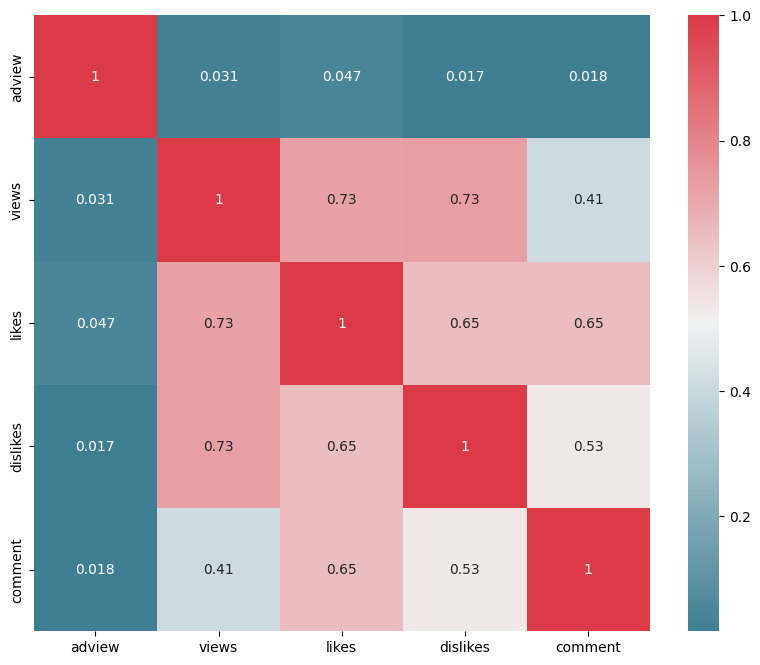

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.cm as cm
f, ax = plt.subplots(figsize=(10, 8))
corr = data1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
data['category'] = l.fit_transform(data['category'])
data['vidid'] = l.fit_transform(data['vidid'])
data['published'] = l.fit_transform(data['published'])
data['duration'] = l.fit_transform(data['duration'])
data.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,5
1,2741,2,1707,56,2,6,2185,3040,3
2,8138,1,2023,25,0,2,2094,1863,2
3,9004,6,620860,777,161,153,2119,2546,7
4,122,1,666,1,0,0,2091,1963,3


In [ ]:
import datetime
import time
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp

train_data = pd.read_csv('/content/train_lyst1720633824458.csv')
mp  = train_data['duration'].apply(checki)
def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)
time1=mp.apply(func_sec)
train_data["duration"]=time1
train_data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,457,F
1,VID_14135,2,1707,56,2,6,2016-10-01,570,D
2,VID_2187,1,2023,25,0,2,2016-07-02,136,C
3,VID_23096,6,620860,777,161,153,2016-07-27,262,H
4,VID_10175,1,666,1,0,0,2016-06-29,31,D


In [ ]:
train_data = train_data[train_data.views !=  'F']
train_data = train_data[train_data.likes !=  'F']
train_data = train_data[train_data.dislikes !=  'F']
train_data = train_data[train_data.comment !=  'F']


In [ ]:
train_data['category'] = l.fit_transform(train_data['category'])
train_data['published'] = l.fit_transform(train_data['published'])


In [ ]:
X = train_data.drop(['vidid','adview'],axis=1)
y = pd.DataFrame(data = train_data.iloc[:, 1].values, columns = ['target'])


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(11709, 7)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
X_train.mean()

0.17395410595763316

In [ ]:
X_train

array([[1.89224285e-04, 4.22797226e-05, 4.04457117e-05, ...,
        6.31556861e-01, 6.90030012e-02, 8.57142857e-01],
       [2.48957209e-04, 5.03833362e-04, 4.04457117e-05, ...,
        4.73772556e-01, 1.46040598e-02, 4.28571429e-01],
       [1.88608556e-04, 6.69428942e-05, 0.00000000e+00, ...,
        4.05371381e-01, 4.20634733e-03, 7.14285714e-01],
       ...,
       [1.48331209e-03, 3.03004679e-04, 7.07799956e-04, ...,
        5.19093580e-01, 5.15159392e-03, 4.28571429e-01],
       [9.86119882e-03, 4.87626135e-03, 1.53087019e-02, ...,
        9.00125892e-01, 5.67147955e-03, 8.57142857e-01],
       [2.87646701e-04, 4.29843847e-04, 1.21337135e-04, ...,
        9.39991607e-02, 8.36543233e-03, 4.28571429e-01]])

In [ ]:
# Evaluation Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
  prediction = model_name.predict(X_test)
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
print_error(X_test,y_test,lr)

Mean Absolute Error: 5288.059212091737
Mean Squared Error: 10881114821.641329
Root Mean Squared Error: 104312.58227865577


In [ ]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)
print_error(X_test,y_test,svr)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 3478.040658670919
Mean Squared Error: 10901271708.174868
Root Mean Squared Error: 104409.15528905914


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
print_error(X_test,y_test,dtr)

Mean Absolute Error: 5406.050204918033
Mean Squared Error: 12283174020.07343
Root Mean Squared Error: 110829.48172789328


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rtr = RandomForestRegressor(max_depth=20,min_samples_split=10,min_samples_leaf=2)
rtr.fit(X_train,y_train)
print_error(X_test,y_test,rtr)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Absolute Error: 5177.249685478712
Mean Squared Error: 10440277760.923294
Root Mean Squared Error: 102177.67741010408


In [ ]:
# Artificial Neural Network
import keras
from keras.layers import Dense
ann = keras.models.Sequential([
Dense(6, activation="relu",
input_shape=X_train.shape[1:]),
Dense(6,activation="relu"),
Dense(1)
])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history=ann.fit(X_train,y_train,epochs=100)
ann.summary()
print_error(X_test,y_test,ann)

Epoch 1/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 882028096.0000 - mean_squared_error: 882028096.0000
Epoch 2/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 648169664.0000 - mean_squared_error: 648169664.0000
Epoch 3/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 672020288.0000 - mean_squared_error: 672020288.0000
Epoch 4/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 786657856.0000 - mean_squared_error: 786657856.0000
Epoch 5/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 744314816.0000 - mean_squared_error: 744314816.0000
Epoch 6/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 483220672.0000 - mean_squared_error: 483220672.0000
Epoch 7/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1203699968.0000 - mean_squared_error: 1203699968.0000
Epoch 8/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 781497792.0000 - mean_squared_error: 781497792.0000
Epoch 9/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 663836864.0000 - mean_squared_err

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 293 (1.15 KB)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 196 (788.00 B)

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Mean Absolute Error: 5143.108918957371
Mean Squared Error: 10886969288.326757
Root Mean Squared Error: 104340.64063598018


In [ ]:
#Saving Scikitlearn models
import joblib
joblib.dump(dtr, "decisiontree_youtubeadview.pkl")
# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")

TEST DATASET

In [ ]:
test_data = pd.read_csv('/content/test_lyst1720633824457.csv')

In [ ]:
test_data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [ ]:
mp  = test_data['duration'].apply(checki)
time1=mp.apply(func_sec)
test_data["duration"]=time1
test_data.head(10)

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,449,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,389,F
2,VID_13967,28534,31,11,1,2014-03-10,2274,D
3,VID_19442,1316715,2284,250,274,2010-06-05,595,G
4,VID_770,1893173,2519,225,116,2016-09-03,188,B
5,VID_10315,145820,215,29,19,2014-01-23,2358,D
6,VID_7417,12921,169,3,73,2014-05-01,604,D
7,VID_17788,4502,65,2,8,2016-07-13,155,F
8,VID_14591,662956,1841,321,219,2014-01-13,837,D
9,VID_1228,552009,6732,97,1100,2016-08-25,1069,B


In [ ]:
test_data = test_data[test_data.views !=  'F']
test_data = test_data[test_data.likes !=  'F']
test_data = test_data[test_data.dislikes !=  'F']
test_data = test_data[test_data.comment !=  'F']


In [ ]:
test_data['category'] = l.fit_transform(test_data['category'])
test_data['published'] = l.fit_transform(test_data['published'])


In [ ]:
test_data=test_data.drop(['vidid'],axis=1)

In [ ]:
test_data = scaler.fit_transform(test_data)

In [ ]:
new_model = keras.models.load_model('ann_youtubeadview.h5')

In [ ]:
pred = new_model.predict(test_data)

268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:

import pandas as pd
pred_df = pd.DataFrame(pred, columns=['adview'])
pred_df.to_csv('PredictedAdview.csv', index=False)
